# Case 20 - Colombian Companies Finantial Statments

## Business Problem

You are a finantial analyst in an investment firm located in Colombia. Your task is to predict if a company is going to produce a positive net cash flow in the next year.

### Packages Import

In [1]:
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  RocCurveDisplay

### Data Import

The information was downloaded from a dataset available in [Sistema Integrado de Información Societaria](https://siis.ia.supersociedades.gov.co/#/).

In [3]:
df_ESF = pd.read_excel('/work/indu5012_case_20/data/210030_Estado de situación financiera, corriente_no corriente.xlsx')
df_ESF.head(5)

,Unnamed: 0,punto de entrada,formulario,NIT,Razón social de la sociedad,Fecha de Corte,Clasificación Industrial Internacional Uniforme Versión 4 A.C,Tipo societario,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección del domicilio,...,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos
0,0,Plenas-Individuales,"Estado de situación financiera, corriente/no c...",890300546,COLGATE PALMOLIVE COMPAÑIA,2019-03-31,"C2023 - Fabricación de jabones y detergentes, ...",02. SUCURSAL EXTRANJERA,CRA 1 NRO. 40 108,VALLE,...,3796574.0,NaN,NaN,NaN,NaN,NaN,-5.045017e+06,2.513752e+08,2.501267e+08,7.002473e+08
1,1,Plenas-Individuales,"Estado de situación financiera, corriente/no c...",890300546,COLGATE PALMOLIVE COMPAÑIA,2019-03-31,"C2023 - Fabricación de jabones y detergentes, ...",02. SUCURSAL EXTRANJERA,CRA 1 NRO. 40 108,VALLE,...,3796574.0,NaN,NaN,NaN,NaN,NaN,-5.253201e+06,2.343044e+08,2.328477e+08,5.645940e+08
2,2,Plenas-Individuales,"Estado de situación financiera, corriente/no c...",860352419,VETRA EXPLORACIÓN Y PRODUCCIÓN COLOMBIA S.A.S.,2019-04-30,B0610 - Extracción de petróleo crudo,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,Avenida Calle 82 No. 10 - 33 P7,BOGOTA D.C.,...,140819639.0,0.0,0.0,0.0,0.0,0.0,3.847746e+06,5.166097e+07,1.963284e+08,2.332102e+08
3,3,Plenas-Individuales,"Estado de situación financiera, corriente/no c...",860352419,VETRA EXPLORACIÓN Y PRODUCCIÓN COLOMBIA S.A.S.,2019-04-30,B0610 - Extracción de petróleo crudo,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,Avenida Calle 82 No. 10 - 33 P7,BOGOTA D.C.,...,140819639.0,NaN,NaN,NaN,NaN,NaN,-2.093195e+06,-6.395997e+07,7.476647e+07,2.796514e+08
4,4,Plenas-Individuales,"Estado de situación financiera, corriente/no c...",800251163,OLEODUCTO CENTRAL SA,2019-06-30,H4930 - Transporte por tuberías,01. SOCIEDAD ANÓNIMA,CRA 11 No 84-09 PISO 10,BOGOTA D.C.,...,155309339.0,NaN,NaN,NaN,NaN,NaN,1.379144e+09,2.476296e+09,4.010749e+09,6.324025e+09


In [4]:
df_FC_base = pd.read_excel('/work/indu5012_case_20/data/520000_Estado de flujos de efectivo - método indirecto.xlsx')
df_FC = df_FC_base[['NIT','Incremento (disminución) neto de efectivo y equivalentes al efectivo','Fecha de Corte']]
df_FC_base.head(20)

,Unnamed: 0,punto de entrada,formulario,NIT,Razón social de la sociedad,Fecha de Corte,Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU),Tipo societario,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección del domicilio,...,(+) Cobros procedentes del reembolso de anticipos y préstamos concedidos a terceros.1,(-) Dividendos pagados,(-) Intereses pagados,(+/-) Otras entradas (salidas) de efectivo.2,Flujos de efectivo netos procedentes de (utilizados en) actividades de financiación,"Incremento (disminución) neto de efectivo y equivalentes al efectivo, antes del efecto de los cambios en la tasa de cambio",(+/-) Efectos de la variación en la tasa de cambio sobre el efectivo y equivalentes al efectivo,Incremento (disminución) neto de efectivo y equivalentes al efectivo,Efectivo y equivalentes al efectivo al principio del periodo,Efectivo y equivalentes al efectivo al final del periodo
0,0,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800251163,OLEODUCTO CENTRAL SA,2020-03-31,H4930 - Transporte por tuberías,01. SOCIEDAD ANÓNIMA,CRA 11 No 84-09 PISO 10,BOGOTA D.C.,...,NaN,1.457423e+09,NaN,NaN,-1.469521e+09,-823122191.0,365502784.0,-457619407.0,NaN,NaN
1,1,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800068713,OLEODUCTO DE COLOMBI S.A.,2020-06-30,H4930 - Transporte por tuberías,01. SOCIEDAD ANÓNIMA,CALLE 113 NO 7 - 80 PISO 13,BOGOTA D.C.,...,NaN,1.783021e+08,NaN,NaN,-1.783021e+08,-112655187.0,6571182.0,-106084005.0,NaN,NaN
2,2,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800251163,OLEODUCTO CENTRAL SA,2020-06-30,H4930 - Transporte por tuberías,01. SOCIEDAD ANÓNIMA,CRA 11 No 84-09 PISO 10,BOGOTA D.C.,...,NaN,NaN,38678000.0,NaN,-4.790212e+07,-192922634.0,-105780021.0,-298702655.0,NaN,NaN
3,3,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,830078038,CERREJON ZONA NORTE S.A.,2020-06-30,B0510 - Extracción de hulla (carbón de piedra),01. SOCIEDAD ANÓNIMA,AC 100 No 19 - 54 P12,BOGOTA D.C.,...,NaN,NaN,NaN,NaN,NaN,103128815.0,28077997.0,131206812.0,NaN,NaN
4,4,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,900640173,EXITO VIAJES Y TURISMO SAS,2020-06-30,N7911 - Actividades de las agencias de viaje,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CL 36 D SUR 27 A 105 LOCAL 164B,ANTIOQUIA,...,NaN,NaN,NaN,-6261650.0,-6.893072e+06,-5538866.0,NaN,-5538866.0,NaN,NaN
5,5,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800251163,OLEODUCTO CENTRAL SA,2020-09-30,H4930 - Transporte por tuberías,01. SOCIEDAD ANÓNIMA,CRA 11 No 84-09 PISO 10,BOGOTA D.C.,...,NaN,1.393308e+09,27293268.0,-21786883.0,-1.498777e+09,-580187178.0,33409907.0,-546777271.0,NaN,NaN
6,6,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800241849,CDI S.A. EN REORGANIZACION,2020-12-31,M7110 - Actividades de arquitectura e ingenier...,01. SOCIEDAD ANÓNIMA,BRR BELLAVISTA CRA 56B #7A-45,BOLIVAR,...,NaN,NaN,275843.0,NaN,-4.501520e+05,1407796.0,NaN,1407796.0,NaN,NaN
7,7,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800241958,HEWLETT PACKARD COLOMBIA LTDA,2020-12-31,J6202 - Actividades de consultoría informática...,03. SOCIEDAD LIMITADA,Kra. 7 # 99-53 Torre 2 Piso 11,BOGOTA D.C.,...,NaN,NaN,NaN,-1670660.0,-1.670660e+06,31045887.0,NaN,31045887.0,NaN,NaN
8,8,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800000946,PROCTER & GAMBLE COLOMBIA LTDA,2020-12-31,G4669 - Comercio al por mayor de otros product...,03. SOCIEDAD LIMITADA,Carrera 7 numero 114 - 33 Piso 12,BOGOTA D.C.,...,NaN,NaN,NaN,NaN,-5.776302e+06,-7038171.0,NaN,-7038171.0,NaN,NaN
9,9,Plenas-Individuales,Estado de flujos de efectivo - método indirecto,800003267,INTERGRAFIC DE OCCIDENTE SA,2020-12-31,C1811 - Actividades de impresión,01. SOCIEDAD ANÓNIMA,AV 6 OESTE 5 163 T 5 1110,VALLE,...,0.0,1.202095e+06,NaN,12217981.0,5.412587e+06,1596767.0,0.0,1596767.0,NaN,NaN


### EDA and Data Cleaning

In [5]:
df_ESF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 67 columns):
 #   Column                                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                               --------------  -----  
 0   Unnamed: 0                                                                                                                                                                                                           5332 non-null   int64  
 1   punto de entrada                                                                                                                                                  

In [6]:
df_ESF = df_ESF[df_ESF['Periodo']=='Periodo Actual']
df_ESF = df_ESF[df_ESF['Fecha de Corte']=='2019-12-31']
df_ESF = df_ESF[df_ESF['Efectivo y equivalentes al efectivo']<750000000]
df_ESF = df_ESF[df_ESF['Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes']<3000000000]
df_ESF = df_ESF[df_ESF['Propiedades, planta y equipo']<10000000000]


df_ESF.drop(columns=[  'Clasificación Industrial Internacional Uniforme Versión 4 A.C',
       'Tipo societario', 'Departamento de la dirección del domicilio','Plusvalía',
       'Activos intangibles distintos de la plusvalía',
       'Activos biológicos no corrientes','Propiedad de inversión','Pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta','Total de pasivos corrientes distintos de los pasivos incluidos en grupos de activos para su disposición clasificados como mantenidos para la venta','Activos no corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo la garantía colateral','Activos no corrientes o grupos de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios','Total activos corrientes distintos de los activos no corrientes o grupo de activos para su disposición clasificados como mantenidos para la venta o como mantenidos para distribuir a los propietarios','Activos corrientes distintos al efectivo pignorados como garantía colateral para las que el receptor de transferencias tiene derecho por contrato o costumbre a vender o pignorar de nuevo dicha garantía colateral', 'Activos biológicos corrientes','Ciudad de la dirección del domicilio','Dirección de notificación judicial registrada en Cámara de Comercio','Unnamed: 0','punto de entrada', 'formulario','Razón social de la sociedad','Fecha de Corte','Periodo'],inplace = True)
df_ESF[['Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes',
       'Inventarios corrientes', 'Activos por impuestos corrientes, corriente',
       'Otros activos financieros corrientes',
       'Otros activos no financieros corrientes',
       'Propiedades, planta y equipo',
       'Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes',
       'Inventarios no corrientes', 'Activos por impuestos diferidos',
       'Activos por impuestos corrientes, no corriente',
       'Otros activos financieros no corrientes',
       'Otros activos no financieros no corrientes',
       'Provisiones corrientes por beneficios a los empleados',
       'Otras provisiones corrientes', 'Total provisiones corrientes',
       'Cuentas por pagar comerciales y otras cuentas por pagar',
       'Pasivos por impuestos corrientes, corriente',
       'Otros pasivos financieros corrientes',
       'Otros pasivos no financieros corrientes',
       'Provisiones no corrientes por beneficios a los empleados',
       'Otras provisiones no corrientes', 'Total provisiones no corrientes',
       'Cuentas comerciales por pagar y otras cuentas por pagar no corrientes',
       'Pasivo por impuestos diferidos',
       'Pasivos por impuestos corrientes, no corriente',
       'Otros pasivos financieros no corrientes',
       'Otros pasivos no financieros no corrientes',
       'Prima de emisión', 'Acciones propias en cartera',
       'Inversión suplementaria al capital asignado',
       'Otras participaciones en el patrimonio', 'Superavit por revaluación',
       'Otras reservas', 'Ganancias acumuladas']] = df_ESF[['Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes',
       'Inventarios corrientes', 'Activos por impuestos corrientes, corriente',
       'Otros activos financieros corrientes',
       'Otros activos no financieros corrientes',
       'Propiedades, planta y equipo',
       'Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes',
       'Inventarios no corrientes', 'Activos por impuestos diferidos',
       'Activos por impuestos corrientes, no corriente',
       'Otros activos financieros no corrientes',
       'Otros activos no financieros no corrientes',
       'Provisiones corrientes por beneficios a los empleados',
       'Otras provisiones corrientes', 'Total provisiones corrientes',
       'Cuentas por pagar comerciales y otras cuentas por pagar',
       'Pasivos por impuestos corrientes, corriente',
       'Otros pasivos financieros corrientes',
       'Otros pasivos no financieros corrientes',
       'Provisiones no corrientes por beneficios a los empleados',
       'Otras provisiones no corrientes', 'Total provisiones no corrientes',
       'Cuentas comerciales por pagar y otras cuentas por pagar no corrientes',
       'Pasivo por impuestos diferidos',
       'Pasivos por impuestos corrientes, no corriente',
       'Otros pasivos financieros no corrientes',
       'Otros pasivos no financieros no corrientes',
       'Prima de emisión', 'Acciones propias en cartera',
       'Inversión suplementaria al capital asignado',
       'Otras participaciones en el patrimonio', 'Superavit por revaluación',
       'Otras reservas', 'Ganancias acumuladas']].fillna(0)
df_ESF.dropna(inplace=True)
df_ESF.head(5)

,NIT,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes totales,"Propiedades, planta y equipo",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,...,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos
20,900338701,839843.0,4100263.0,3376618.0,1168250.0,0.0,8443.0,13048116.0,61115019.0,0.0,...,2100000.0,0.0,0.0,0.0,0.0,0.0,13206020.0,4729404.0,20035424.0,76584154.0
22,800028773,7701.0,806959.0,0.0,0.0,412161.0,47154.0,1273975.0,79716.0,0.0,...,25000.0,0.0,0.0,0.0,0.0,0.0,12500.0,9354722.0,9392222.0,9957159.0
24,900156499,13822525.0,16104625.0,22066712.0,0.0,46208.0,0.0,52040070.0,2312687.0,918783.0,...,321933.0,25091869.0,0.0,0.0,0.0,0.0,881103.0,4019674.0,30314579.0,58710006.0
26,900448840,210.0,56374.0,0.0,34099.0,0.0,0.0,90683.0,15883005.0,0.0,...,2000000.0,0.0,0.0,0.0,39755.0,7890056.0,363.0,-3743766.0,6186408.0,16138121.0
30,802002435,14989146.0,12217495.0,549103.0,3914337.0,0.0,0.0,31670081.0,402617.0,0.0,...,2138297.0,36796772.0,0.0,0.0,0.0,0.0,859277.0,-15796669.0,23997677.0,32876416.0


In [7]:
df_FC = df_FC[df_FC['Fecha de Corte']=='2020-12-31']
df_FC.dropna(inplace=True)

def aumento (x):
    if x > 0:
        return 1
    else:
        return 0

df_FC['Incremento_FC'] = df_FC['Incremento (disminución) neto de efectivo y equivalentes al efectivo'].apply(aumento)

df_FC.drop(columns=['Incremento (disminución) neto de efectivo y equivalentes al efectivo','Fecha de Corte'],inplace=True)
df_FC.head(5)

,NIT,Incremento_FC
6,800241849,1
7,800241958,1
8,800000946,0
9,800003267,1
10,800004599,0


In [8]:
df_combinado = df_ESF.merge(df_FC,on='NIT',how='inner')
df_combinado.head(5)

,NIT,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes totales,"Propiedades, planta y equipo",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,...,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos,Incremento_FC
0,800028773,7701.0,806959.0,0.0,0.0,412161.0,47154.0,1273975.0,79716.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12500.0,9354722.0,9392222.0,9957159.0,1
1,900156499,13822525.0,16104625.0,22066712.0,0.0,46208.0,0.0,52040070.0,2312687.0,918783.0,...,25091869.0,0.0,0.0,0.0,0.0,881103.0,4019674.0,30314579.0,58710006.0,1
2,900448840,210.0,56374.0,0.0,34099.0,0.0,0.0,90683.0,15883005.0,0.0,...,0.0,0.0,0.0,39755.0,7890056.0,363.0,-3743766.0,6186408.0,16138121.0,0
3,802002435,14989146.0,12217495.0,549103.0,3914337.0,0.0,0.0,31670081.0,402617.0,0.0,...,36796772.0,0.0,0.0,0.0,0.0,859277.0,-15796669.0,23997677.0,32876416.0,1
4,900358036,58549.0,1725655.0,46803.0,235046.0,0.0,0.0,2066053.0,0.0,12193.0,...,11426319.0,0.0,0.0,0.0,0.0,266855.0,-12048519.0,1424246.0,2078248.0,1


## Modelo K-Means

In [9]:
import sklearn

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, OrdinalEncoder

In [10]:
df_ESF_KMeans = df_ESF.copy()
df_ESF_KMeans_scaled= df_ESF.copy()

scaler = RobustScaler()

for column in df_ESF_KMeans_scaled.columns:

    df_ESF_KMeans_scaled[column] = scaler.fit_transform(df_ESF[column].values.reshape(-1,1))

df_ESF_KMeans_scaled.head(5)

,NIT,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes totales,"Propiedades, planta y equipo",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,...,Capital emitido,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos
20,0.144132,-0.112461,-0.168160,0.009244,0.276842,0.000000,0.052746,-0.155776,2.329612,0.000000,...,0.115001,0.000000,0.0,0.0,0.0,0.000000,3.711402,0.118470,0.091187,0.338841
22,-1.283126,-0.265318,-0.313207,-0.216771,-0.211766,25.368437,0.294585,-0.395358,-0.275871,0.000000,...,-0.287332,0.000000,0.0,0.0,0.0,0.000000,-0.147412,0.429136,-0.195447,-0.375902
24,0.141539,2.272334,0.360552,1.260271,-0.211766,2.844094,0.000000,0.637640,-0.180550,15.800224,...,-0.229758,6.616046,0.0,0.0,0.0,0.000000,0.106635,0.070800,0.368017,0.147096
26,0.145699,-0.266694,-0.346266,-0.216771,-0.197504,0.000000,0.000000,-0.419436,0.398742,0.000000,...,0.095612,0.000000,0.0,0.0,39755.0,324.020287,-0.150962,-0.450641,-0.281783,-0.309596
30,-1.255044,2.486631,0.189350,-0.180017,1.425365,0.000000,0.000000,0.223148,-0.262087,0.000000,...,0.122427,9.702311,0.0,0.0,0.0,0.000000,0.100251,-1.260189,0.197896,-0.130035


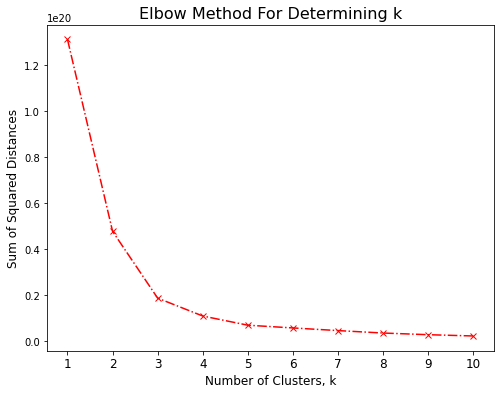

In [11]:
sum_sq_d = []
K = range(1,11)

for k in K:
    km = KMeans(n_clusters=k,random_state=50000000)
    km = km.fit(df_ESF_KMeans_scaled)
    sum_sq_d.append(km.inertia_)
    
plt.figure(figsize=(8,6))

plt.plot(K, sum_sq_d, 'rx-.')

plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)

plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)

plt.title('Elbow Method For Determining k', fontsize=16)

plt.show()

In [12]:
k = 3

kmeans = KMeans(n_clusters=k, init='k-means++',random_state=50000000)
kmeans.fit(df_ESF_KMeans)
labels = kmeans.predict(df_ESF_KMeans)

df_ESF_KMeans['labels']=labels

df_ESF_KMeans_grouped = df_ESF_KMeans.groupby(['labels']).mean()
df_ESF_KMeans_grouped['label'] = [0,1,2]
df_ESF_KMeans_grouped.head(5)

,NIT,Efectivo y equivalentes al efectivo,Cuentas comerciales por cobrar y otras cuentas por cobrar corrientes,Inventarios corrientes,"Activos por impuestos corrientes, corriente",Otros activos financieros corrientes,Otros activos no financieros corrientes,Activos corrientes totales,"Propiedades, planta y equipo",Cuentas comerciales por cobrar y otras cuentas por cobrar no corrientes,...,Prima de emisión,Acciones propias en cartera,Inversión suplementaria al capital asignado,Otras participaciones en el patrimonio,Superavit por revaluación,Otras reservas,Ganancias acumuladas,Patrimonio total,Total de patrimonio y pasivos,label
labels,,,,,,,,,,,,,,,,,,,,,
0,8.629851e+08,5.593901e+06,2.009247e+07,1.277519e+07,2.179283e+06,7.936239e+05,7.091977e+05,4.244224e+07,2.272518e+07,3.018102e+06,...,1.078411e+07,2.280199e+04,3.187688e+06,1.451318e+06,3.730157e+06,5.504086e+06,1.594214e+06,3.270256e+07,8.058254e+07,0
1,8.601747e+08,1.137946e+08,5.182869e+08,3.328931e+08,1.290714e+08,3.636497e+07,1.197036e+07,1.142381e+09,3.290994e+09,3.216780e+08,...,4.834505e+08,0.000000e+00,3.529542e+08,3.091167e+07,0.000000e+00,1.525967e+09,9.890494e+08,3.483586e+09,5.326852e+09,1
2,8.691257e+08,6.194532e+07,2.041792e+08,1.019300e+08,1.744649e+07,1.461360e+07,9.346460e+06,4.129789e+08,3.600703e+08,3.619182e+07,...,1.001434e+08,1.310380e+06,-1.914050e+07,6.987849e+06,2.936137e+07,9.646433e+07,2.515691e+08,5.106544e+08,1.016509e+09,2


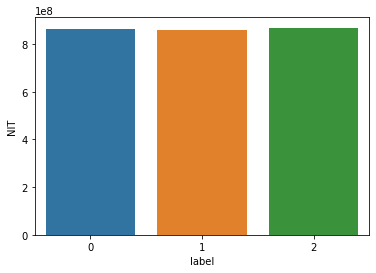

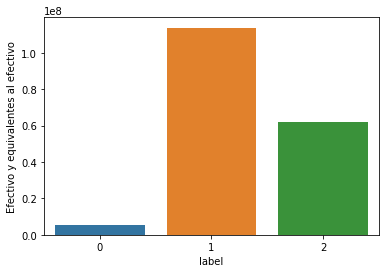

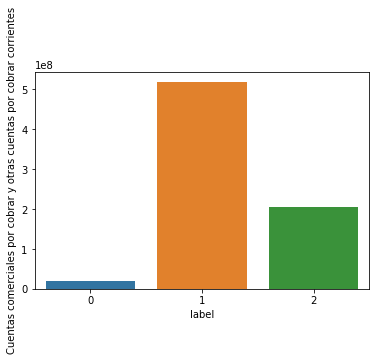

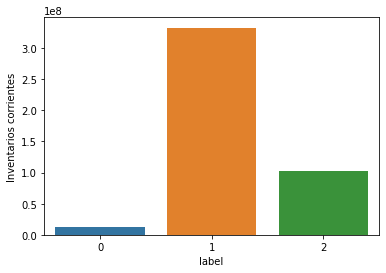

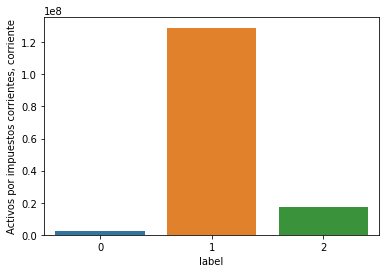

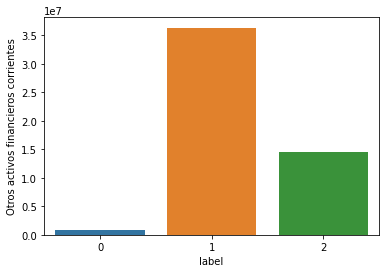

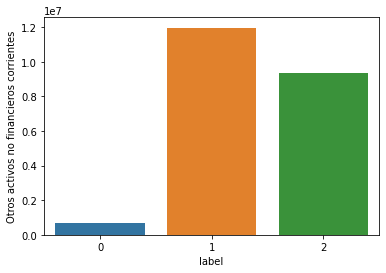

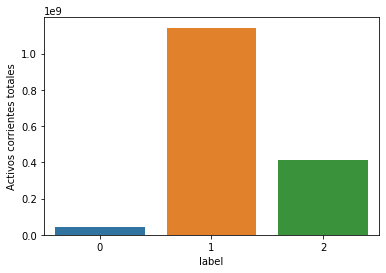

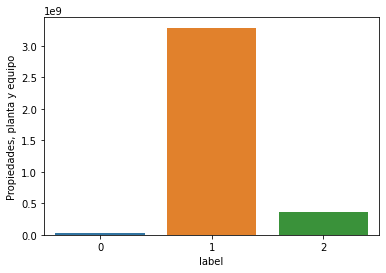

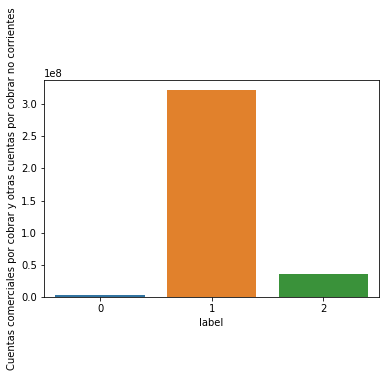

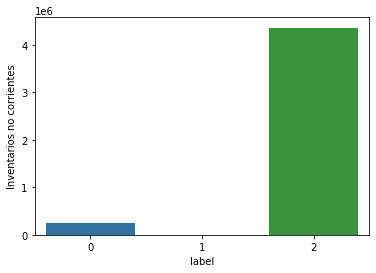

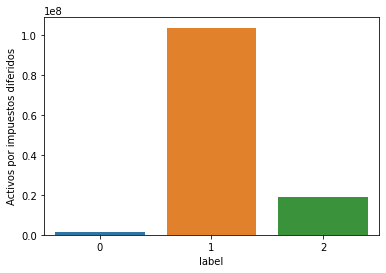

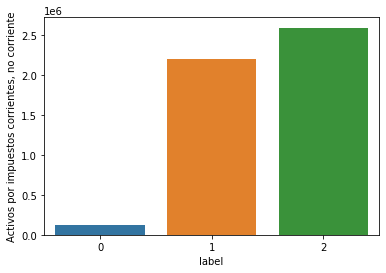

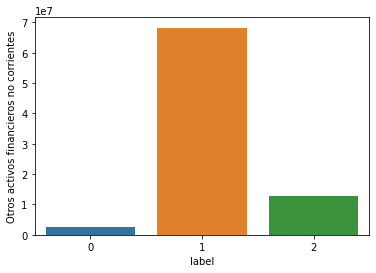

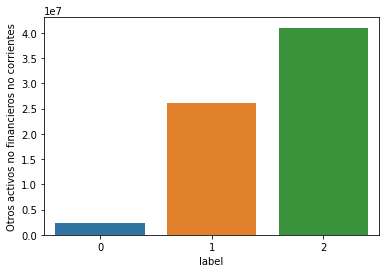

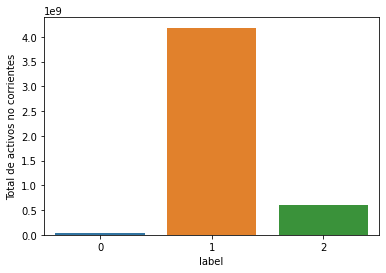

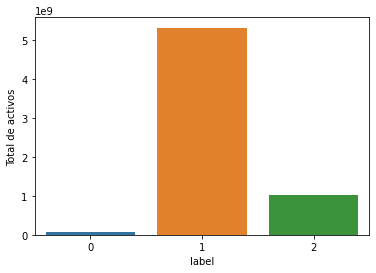

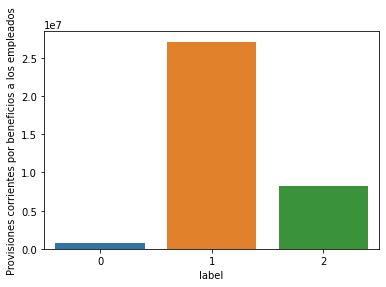

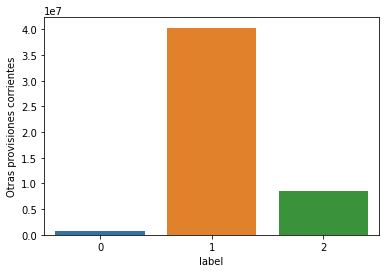

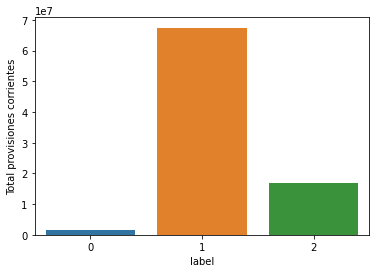

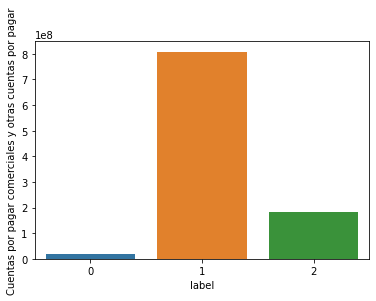

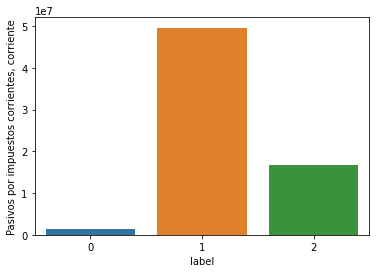

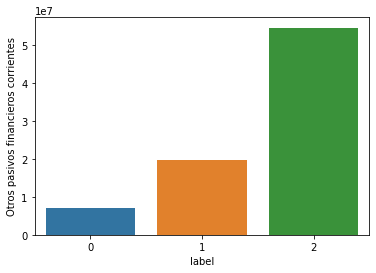

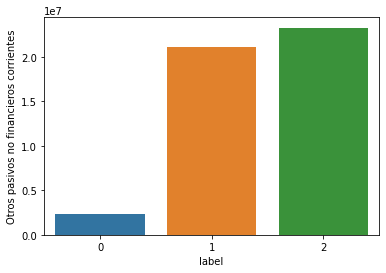

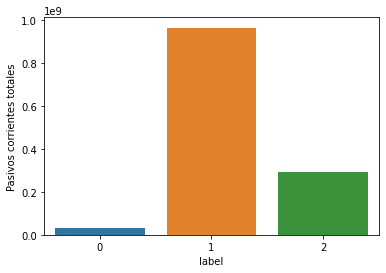

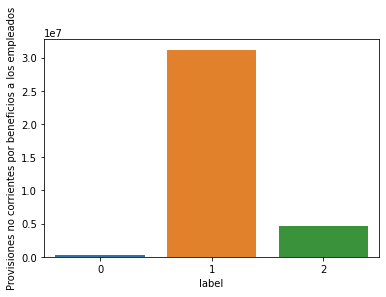

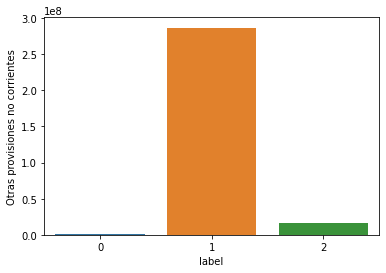

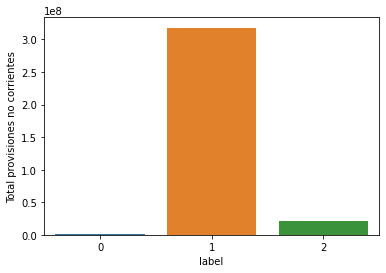

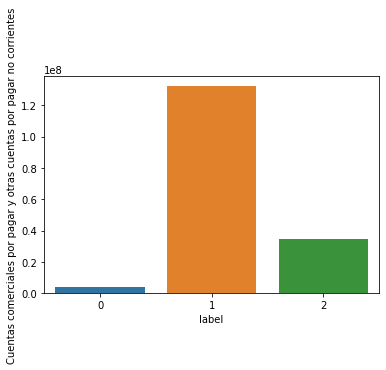

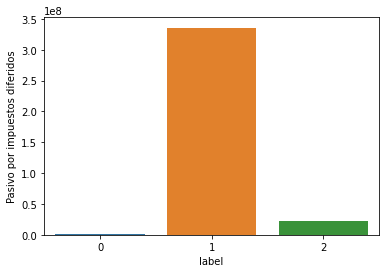

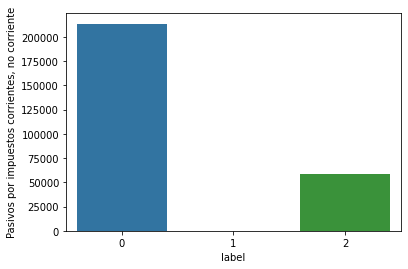

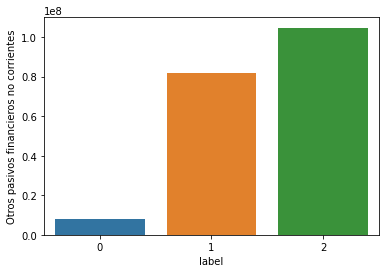

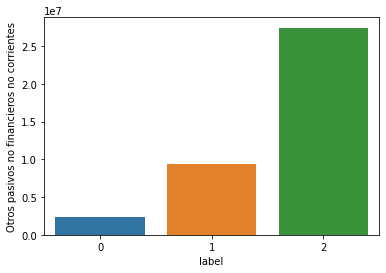

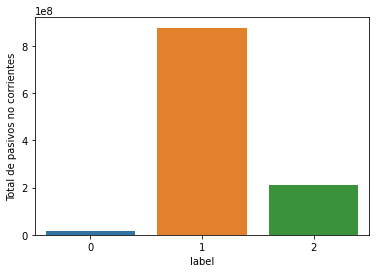

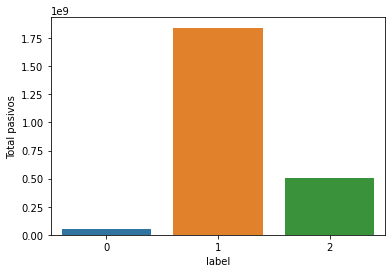

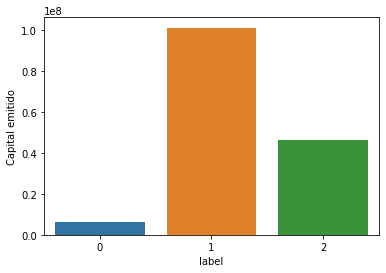

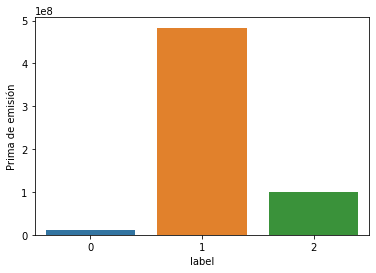

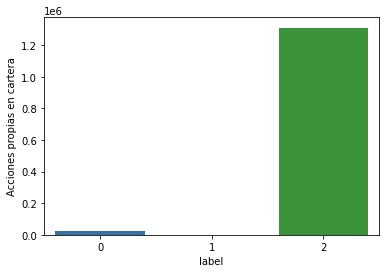

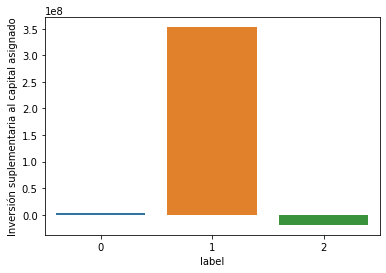

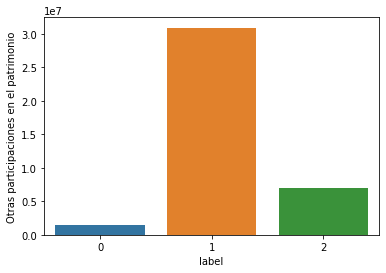

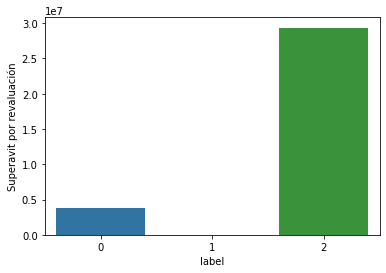

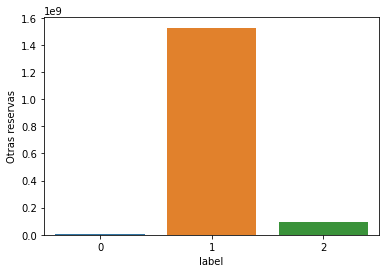

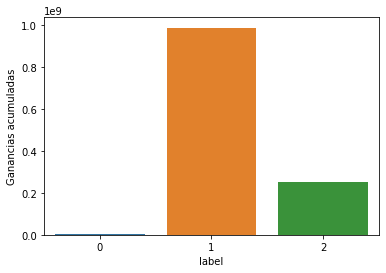

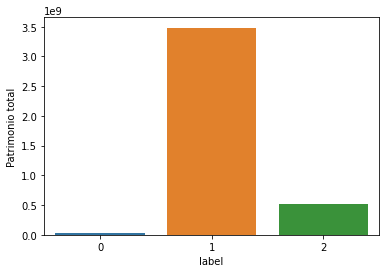

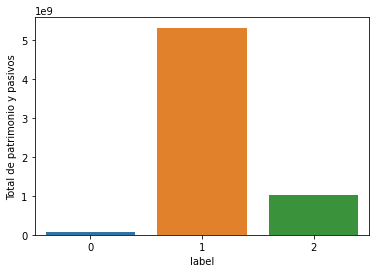

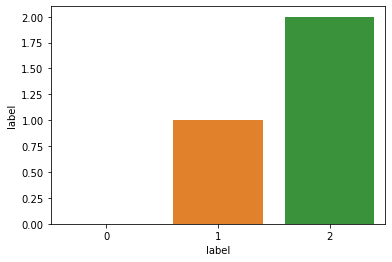

In [13]:
for column in df_ESF_KMeans_grouped.columns:
    sns.barplot(x = 'label', y = column ,data = df_ESF_KMeans_grouped) 
    plt.show()

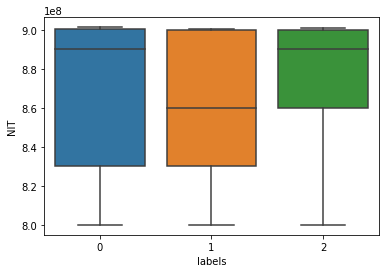

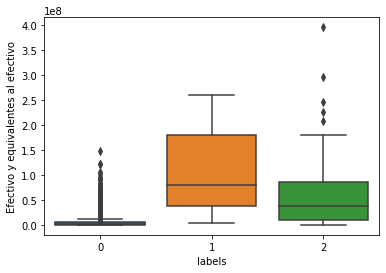

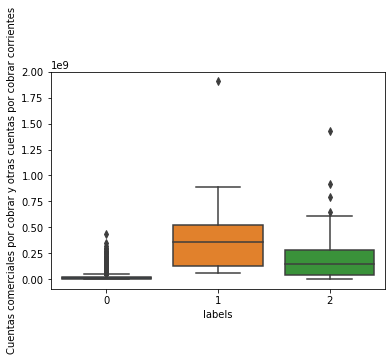

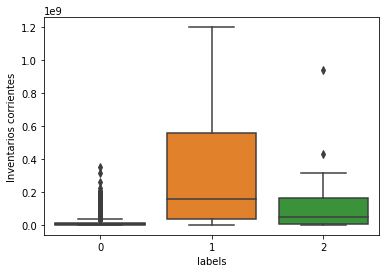

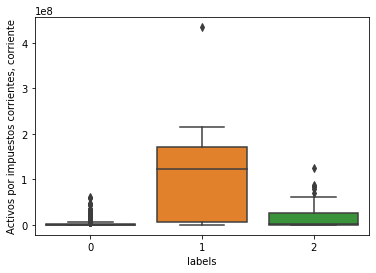

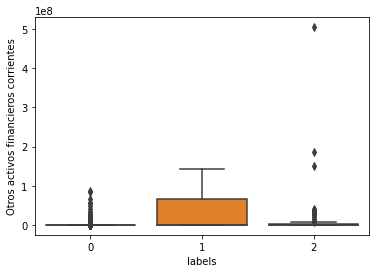

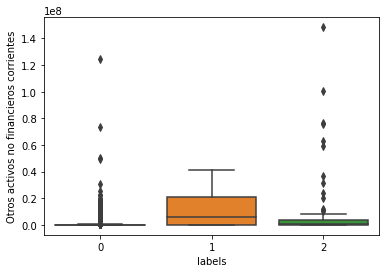

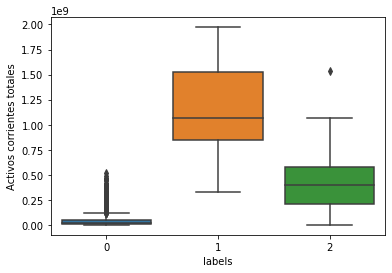

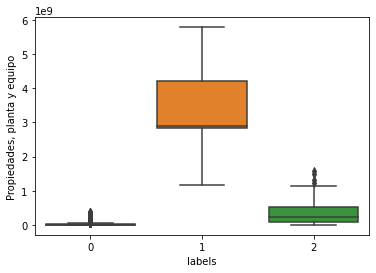

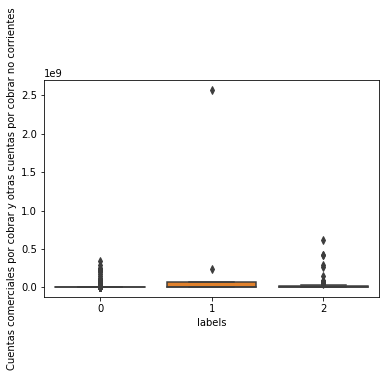

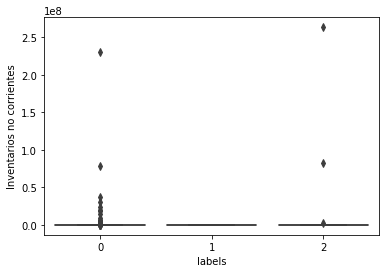

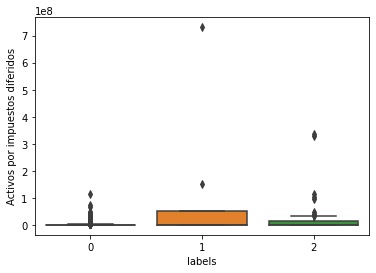

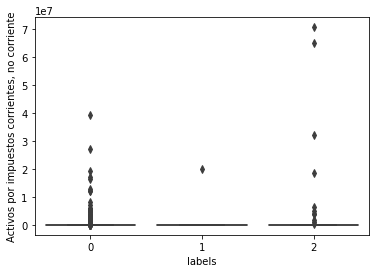

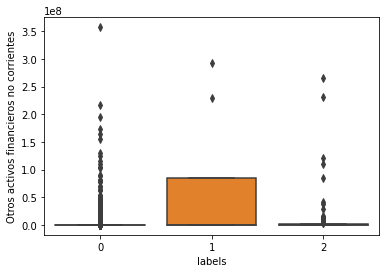

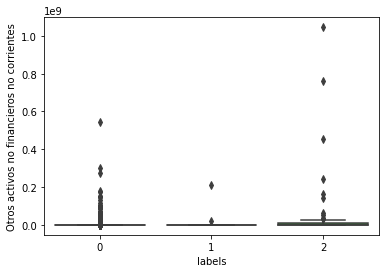

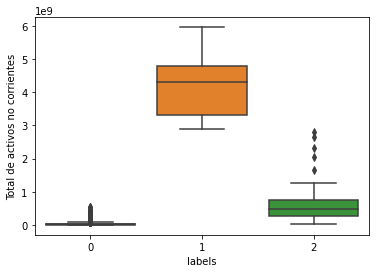

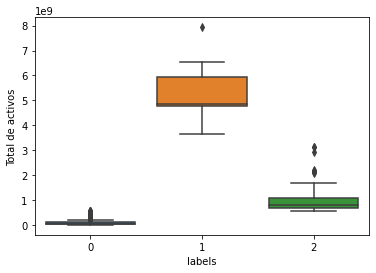

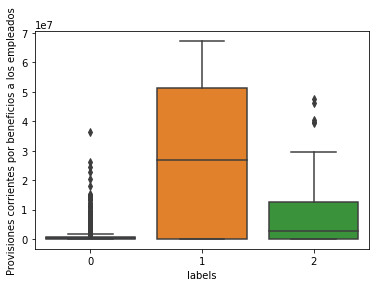

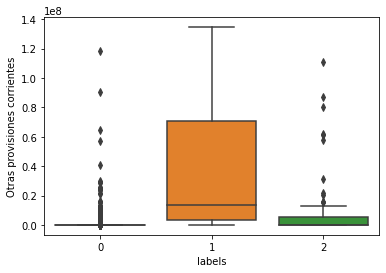

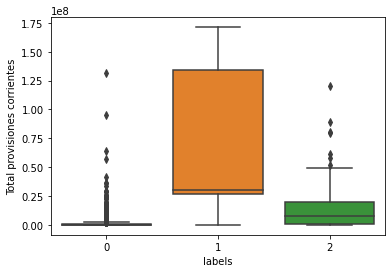

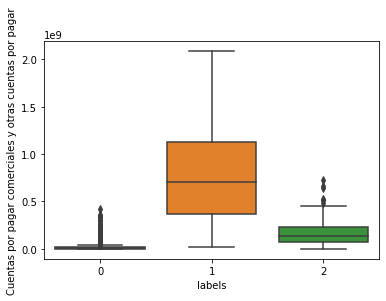

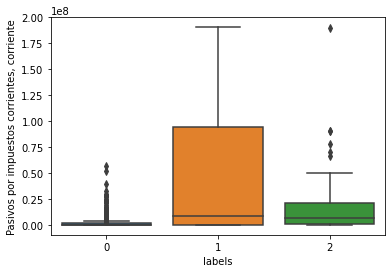

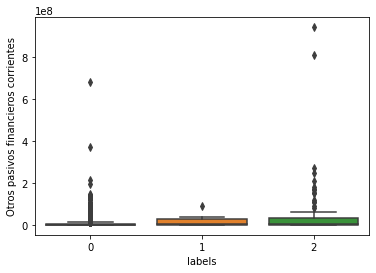

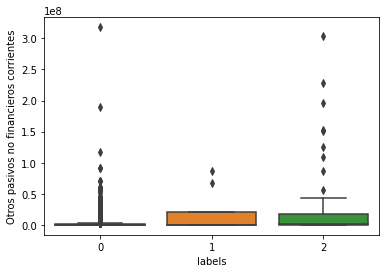

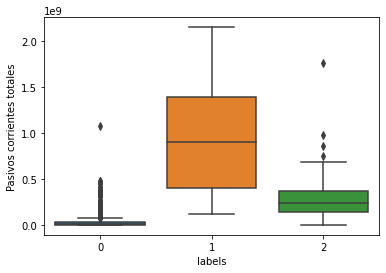

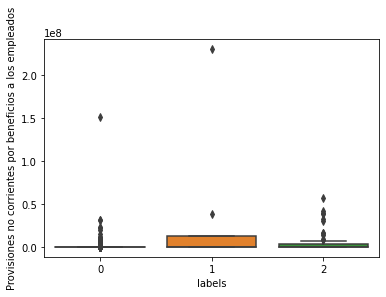

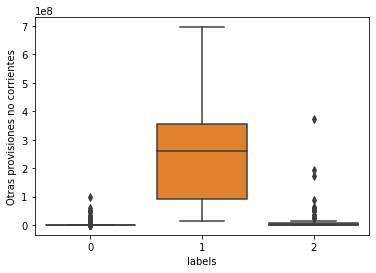

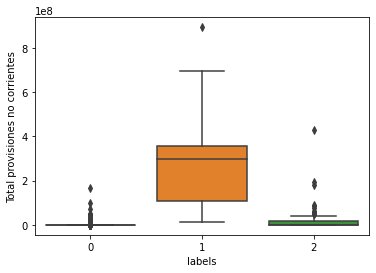

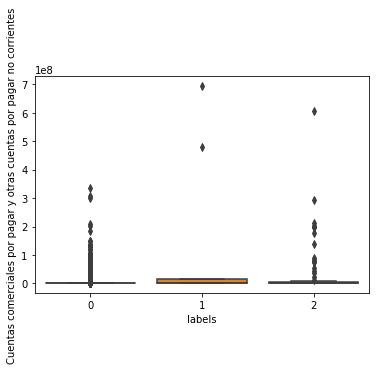

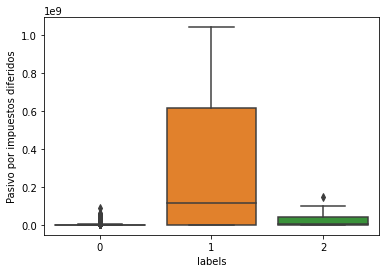

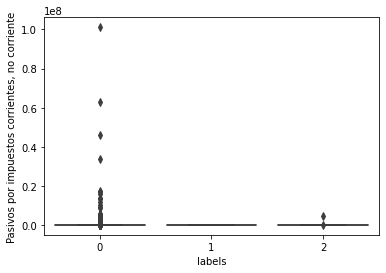

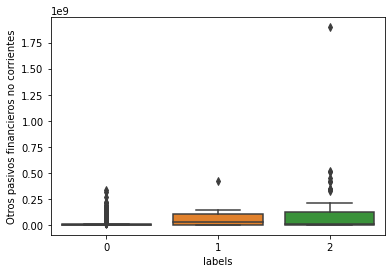

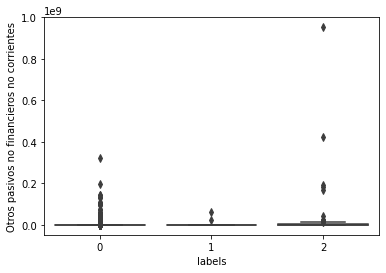

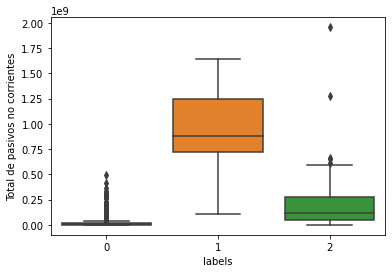

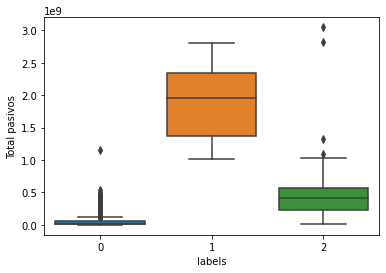

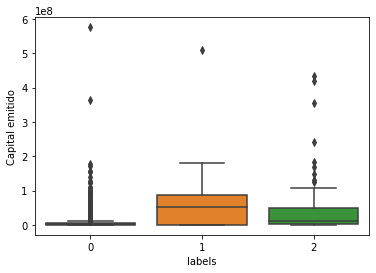

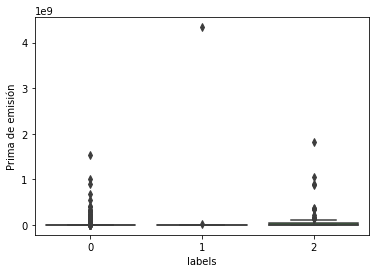

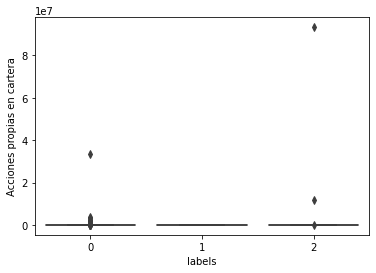

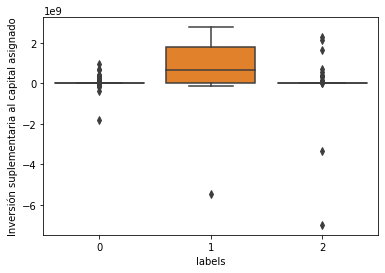

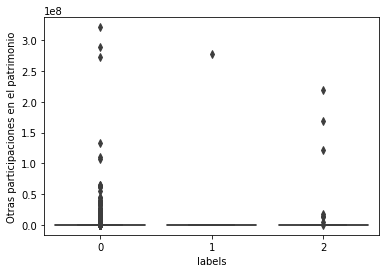

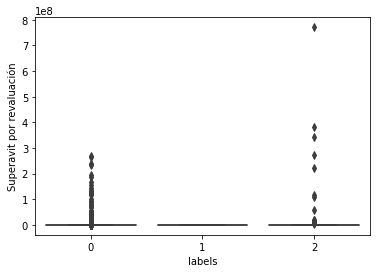

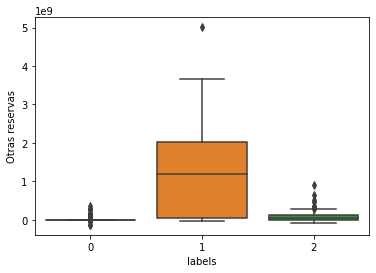

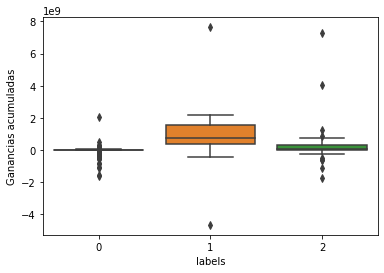

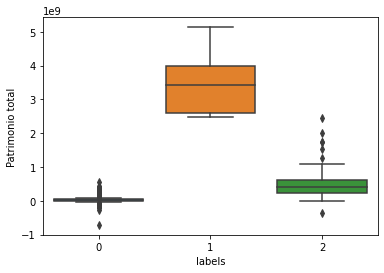

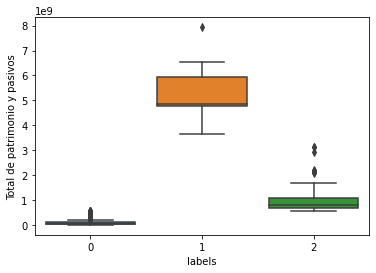

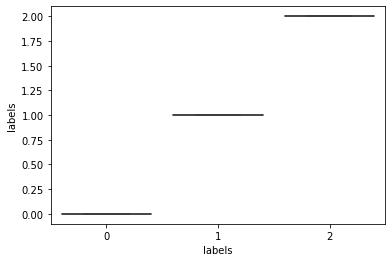

In [14]:
for column in df_ESF_KMeans.columns:
    sns.boxplot(x = 'labels', y = column ,data = df_ESF_KMeans) 
    plt.show()

### Train - Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(df_combinado.drop(columns='Incremento_FC'), df_combinado['Incremento_FC'] , test_size=0.2, random_state=555555555)

In [ ]:
X_train.columns

### Model Fitting

In [16]:
#Defining model
svc = SVC()

#Fitting model
svc_res = svc.fit(X_train, Y_train)

### Model validation metrics

In [17]:
scores = cross_val_score(svc, X_train, Y_train, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: ",scores.mean())

scores = cross_val_score(svc,  X_train, Y_train, cv=10, scoring='recall')
print("Recall: ",scores.mean())

scores = cross_val_score(svc,  X_train, Y_train, cv=10, scoring='roc_auc')
print("Roc_auc: ",scores.mean())

[0.62130178 0.63313609 0.62721893 0.63905325 0.62130178 0.63905325
 0.63905325 0.61538462 0.63690476 0.63095238]
Accuracy:  0.6303360101437023
Recall:  0.9877358490566038
Roc_auc:  0.5875863451487311


#### Model Adjustments

In [18]:
'''param_grid = {'kernel': ['linear', 'poly']}

svc = SVC()

grid = GridSearchCV(svc, param_grid, scoring='roc_auc', cv=10)

grid.fit(X_train, Y_train)

# Best estimators
print("Best SVC parameters: ",grid.best_estimator_)
print('Best SVC roc_auc score: %.3f' % np.abs(grid.best_score_))'''

'param_grid = {\'kernel\': [\'linear\', \'poly\']}\n\nsvc = SVC()\n\ngrid = GridSearchCV(svc, param_grid, scoring=\'roc_auc\', cv=10)\n\ngrid.fit(X_train, Y_train)\n\n# Best estimators\nprint("Best SVC parameters: ",grid.best_estimator_)\nprint(\'Best SVC roc_auc score: %.3f\' % np.abs(grid.best_score_))'

#### Model Testing

In [ ]:
svc = SVC(kernel='linear')
svc_res = svc.fit(X_train, Y_train)

RocCurveDisplay.from_estimator(svc_res, X_test, Y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

#### Model Use

In [ ]:
index = rd.randit(0,X_test.shape[0])

#Take one data
empresa_aleatoria = X_test.iloc[index]

# Make a prediction
prediccion = svc_res.predict(empresa_aleatoria)
print(prediccion)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>